In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import sklearn
import re
import datetime
import dateutil.parser
import statistics
import seaborn as sns


In [2]:
df = pd.read_csv('football_data.csv')

In [3]:
df

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18202,18202,238813,J. Lundstram,19,https://cdn.sofifa.org/players/4/19/238813.png,England,https://cdn.sofifa.org/flags/14.png,47,65,Crewe Alexandra,...,45.0,40.0,48.0,47.0,10.0,13.0,7.0,8.0,9.0,€143K
18203,18203,243165,N. Christoffersson,19,https://cdn.sofifa.org/players/4/19/243165.png,Sweden,https://cdn.sofifa.org/flags/46.png,47,63,Trelleborgs FF,...,42.0,22.0,15.0,19.0,10.0,9.0,9.0,5.0,12.0,€113K
18204,18204,241638,B. Worman,16,https://cdn.sofifa.org/players/4/19/241638.png,England,https://cdn.sofifa.org/flags/14.png,47,67,Cambridge United,...,41.0,32.0,13.0,11.0,6.0,5.0,10.0,6.0,13.0,€165K
18205,18205,246268,D. Walker-Rice,17,https://cdn.sofifa.org/players/4/19/246268.png,England,https://cdn.sofifa.org/flags/14.png,47,66,Tranmere Rovers,...,46.0,20.0,25.0,27.0,14.0,6.0,14.0,8.0,9.0,€143K


In [4]:
# remove columns with more than 1000 missing value
a=df.isna().sum()

for x,y in zip(a.index,a):
    if y>1000:
        df=df.drop([x], axis = 1) 

# remove Photo,Flag and Club Logo Link columns
try:
    df=df.drop(['Photo','Flag','Club Logo'],axis=1)
except:
    print("Already Removed")
    
# remove rows with nan data
df = df.dropna(how='any',axis=0) 


In [5]:
df.columns

Index(['Unnamed: 0', 'ID', 'Name', 'Age', 'Nationality', 'Overall',
       'Potential', 'Club', 'Value', 'Wage', 'Special', 'Preferred Foot',
       'International Reputation', 'Weak Foot', 'Skill Moves', 'Work Rate',
       'Body Type', 'Real Face', 'Position', 'Jersey Number',
       'Contract Valid Until', 'Height', 'Weight', 'Crossing', 'Finishing',
       'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling', 'Curve',
       'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
       'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
       'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
       'Marking', 'StandingTackle', 'SlidingTackle', 'GKDiving', 'GKHandling',
       'GKKicking', 'GKPositioning', 'GKReflexes'],
      dtype='object')

In [6]:
# Height to Float
def h2f(x):
    x=x.split("\'")
    if len(x)==2:
        return float(x[0])+float(x[1])/12
    else:
        return float(x[0])

df['Height']=df['Height'].apply(h2f)


In [7]:
# Weight to Float


def w2f(x):
    x=x.split('lbs')
    return float(x[0])


df['Weight']=df['Weight'].apply(w2f)

# 1. Data visualisation

###      Histogram for Height, Weight and BMI 

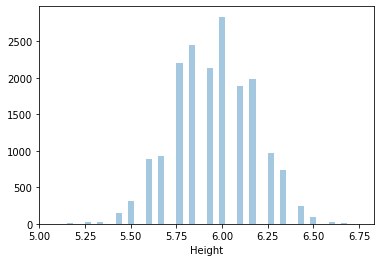

In [8]:
#Heigth
height_data=df['Height']
sns.distplot(height_data.to_numpy(),kde=False,axlabel="Height")


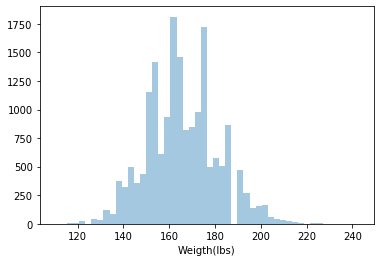

In [9]:

#Weight
weigth_data=df['Weight']
sns.distplot(weigth_data.to_numpy(),kde=False,axlabel="Weigth(lbs)")


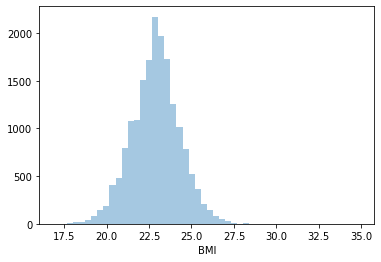

In [10]:
#BMI
bmi=703*(weigth_data.to_numpy())/((12*height_data.to_numpy())**2)
sns.distplot(bmi,kde=False,axlabel="BMI")


###  Distribution of players in different country on the basis of some attribute.

In [11]:
nations = df['Nationality'].unique().tolist()
diction_nation = dict([])
for nation in nations:
    diction_nation[nation] = (df['Nationality'] == nation).sum()
list_nation = list(diction_nation.items())

important_nations = sorted(list_nation,key = lambda x:x[1], reverse = True)[:10]

important_nations = [ x for x,y in important_nations]
impn_data = df[df['Nationality'].isin(important_nations)]

/home/shivaansehgal/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


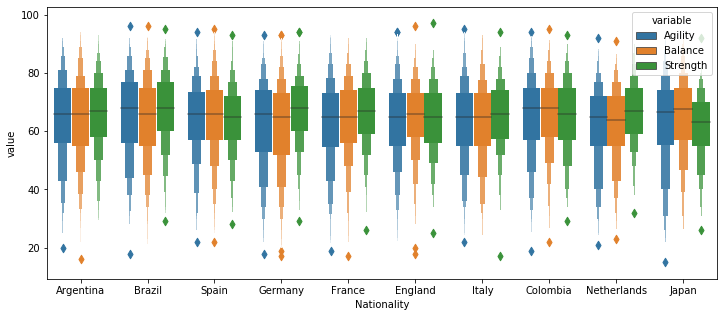

In [12]:
impn_data['Unnamed: 0'] = impn_data.index
impn_plot = impn_data.melt(id_vars='Nationality', value_vars=['Agility', 'Balance','Strength'])

plt.figure(figsize=(12,5))
# sns.lineplot(data=impn_data,y = df['Agility'].mean(), x='Nationality',palette = '#000000')
sns.boxenplot(data=impn_plot,y = 'value',hue='variable', x='Nationality')
plt.show()


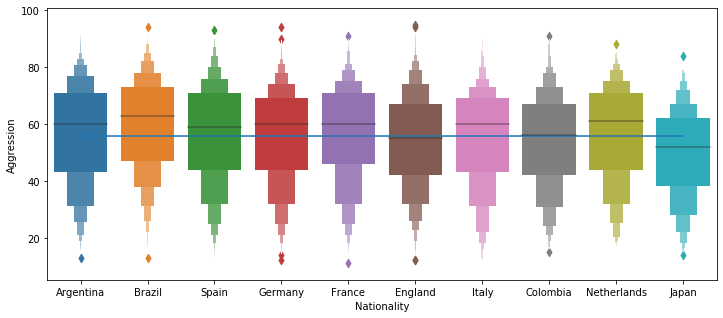

In [13]:

plt.figure(figsize=(12,5))
sns.lineplot(data=impn_data,y = df['Aggression'].mean(), x='Nationality',palette = '#000000')
sns.boxenplot(data=impn_data,y = 'Aggression', x='Nationality')
plt.show()


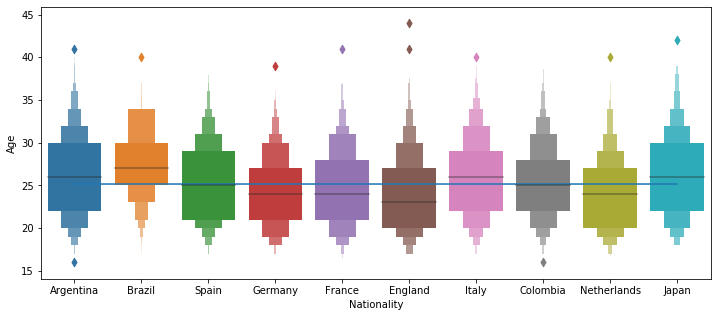

In [14]:
plt.figure(figsize=(12,5))
sns.lineplot(data=impn_data,y = df['Age'].mean(), x='Nationality',palette = '#000000')
sns.boxenplot(data=impn_data,y = 'Age', x='Nationality')
plt.show()


###  Features of players according to their position.

In [15]:
pp=df['Position'].to_numpy()
np.unique(pp)

array(['CAM', 'CB', 'CDM', 'CF', 'CM', 'GK', 'LAM', 'LB', 'LCB', 'LCM',
       'LDM', 'LF', 'LM', 'LS', 'LW', 'LWB', 'RAM', 'RB', 'RCB', 'RCM',
       'RDM', 'RF', 'RM', 'RS', 'RW', 'RWB', 'ST'], dtype=object)

In [16]:
positions = df['Position'].unique().tolist()
diction_position = dict([])
for position in positions:
    diction_position[position] = (pp == position).sum()
list_position = list(diction_position.items())

important_position = sorted(list_position,key = lambda x:x[1], reverse = True)[:10]
print(important_position)
important_position = [ x for x,y in important_position]

[('ST', 2130), ('GK', 1992), ('CB', 1754), ('CM', 1377), ('LB', 1305), ('RB', 1268), ('RM', 1114), ('LM', 1086), ('CAM', 948), ('CDM', 936)]


/home/shivaansehgal/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


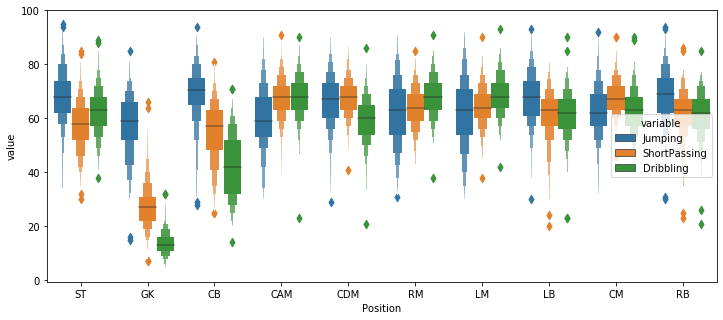

In [17]:
impn_data = df[df['Position'].isin(important_position)]
impn_data['Unnamed: 0'] = impn_data.index
impn_plot = impn_data.melt(id_vars='Position', value_vars=['Jumping', 'ShortPassing','Dribbling'])

plt.figure(figsize=(12,5))
# sns.lineplot(data=impn_data,y = df['Agility'].mean(), x='Nationality',palette = '#000000')
sns.boxenplot(data=impn_plot,y = 'value',hue='variable', x='Position')
plt.show()


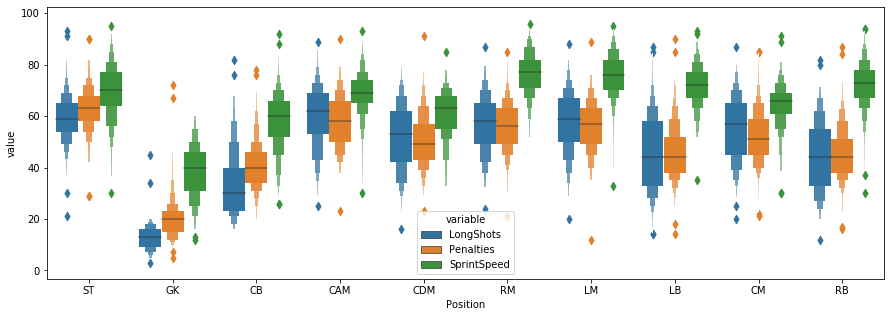

In [18]:

impn_plot = impn_data.melt(id_vars='Position', value_vars=['LongShots', 'Penalties','SprintSpeed'])

plt.figure(figsize=(15,5))
# sns.lineplot(data=impn_data,y = df['Agility'].mean(), x='Nationality',palette = '#000000')
sns.boxenplot(data=impn_plot,y = 'value',hue='variable', x='Position')
plt.show()


### Outliers

# 2. K-means

In [4]:
def dist(x1,x2):
    x1 = np.array(x1)
    x2 = np.array(x2)
    assert x1.shape == x2.shape
    
    return np.linalg.norm(x1-x2,2)

In [39]:
class k_means_clustering:
    def __init__(self,k = 2, max_iterations = 100, tolerance = 0.1):
        self.k = k
        self.max_iterations = max_iterations
        self.tolerance = tolerance
    def fit(self, X):
        
        X = X.copy()
        np.random.shuffle(X)
        self.centers = X[:self.k]
        
        for iter_n in range(self.max_iterations):
            self.new_close = list(range(self.k))
            
            for i in range(self.k):
                self.new_close[i] = []
                
            for x in X:
                closest = np.argmin(np.array([ dist(x,self.centers[i]) for i in range(self.k)]))
                self.new_close[closest].append(x)
                
            self.new_centers = self.centers.copy()
            
            for i in range(self.k):
                self.new_centers[i] = np.mean(np.array(self.new_close[i]),axis = 0)

            cf = 0
            for i in range(self.k):
                if dist(self.new_centers[i],self.centers[i]) > self.tolerance:
                    cf = 1
                
            self.centers = self.new_centers.copy()        
            if not cf:
                break
                
    def predict(self, X):
        n = X.shape[0]
        labels = np.zeros(X.shape[0])
        for i in range(n):
            labels[i] = np.argmin(np.array([ dist(X[i],self.centers[j]) for j in range(self.k)]))
        return labels

In [49]:
temp = np.vstack([np.random.randn(20,2),np.random.randn(10,2)+5])
np.random.shuffle(temp)
temp

array([[ 0.23986654,  0.3728261 ],
       [ 4.86657035,  3.02630053],
       [ 4.63354306,  4.69181919],
       [ 5.0592567 ,  6.08022863],
       [ 5.96882121,  5.0654786 ],
       [ 0.10689459,  0.60083271],
       [-1.05473256,  1.92448095],
       [-0.69452588,  0.20974768],
       [-0.21411799, -1.49184561],
       [ 1.35400263, -0.58240576],
       [ 4.82370348,  4.75177696],
       [ 1.04982343,  0.54022429],
       [ 0.27401466, -0.25657652],
       [ 0.95730411, -0.55119509],
       [ 5.58287598,  5.86112893],
       [-0.80784934,  1.23650392],
       [ 4.30852861,  4.80150399],
       [ 0.1224573 , -1.47190267],
       [-0.42486334,  0.32346354],
       [-1.02428501, -2.79863283],
       [ 0.03684331, -1.9676816 ],
       [ 7.6067051 ,  6.41283342],
       [ 5.50299959,  5.38890601],
       [ 0.20922261, -0.85560314],
       [-0.68304965, -0.57438501],
       [-3.33387399,  2.13946581],
       [ 4.8959857 ,  4.55172509],
       [ 0.45966196, -2.21707625],
       [ 0.77979865,

In [50]:
kmeans = k_means_clustering()

In [51]:
kmeans.fit(temp)

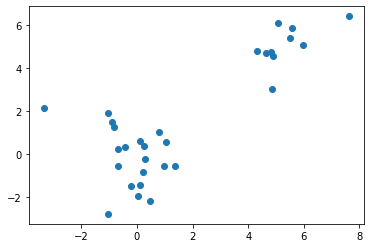

In [52]:
plt.scatter(temp[:,0],temp[:,1])

In [53]:
labels = kmeans.predict(temp)

In [54]:
labels

array([1., 0., 0., 0., 0., 1., 1., 1., 1., 1., 0., 1., 1., 1., 0., 1., 0.,
       1., 1., 1., 1., 0., 0., 1., 1., 1., 0., 1., 1., 1.])

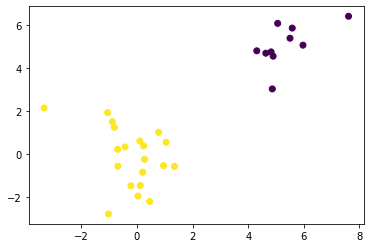

In [55]:
plt.scatter(temp[:,0],temp[:,1], c = labels)